In [1]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import seaborn as se
se.set_style('white')
se.set_context('poster')
import re
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
raw_df = pd.read_csv('raw_dataframe.csv')

In [3]:
data = []
file_path = 'similarities.txt'
with open(file_path, 'r') as file:

    for i, line in enumerate(file):

        pattern = r'Cosine similarity between (\S+) and (\S+): ([0-9.]+)'
        match = re.search(pattern, line)
        if match:
            case1 = 'Case_'+str(raw_df.case_id[int(match.group(1).split('_')[1])])
            case2 = 'Case_'+str(raw_df.case_id[int(match.group(2).split('_')[1])])
            similarity = float(match.group(3))
            data.append([case1, case2, similarity])

df = pd.DataFrame(data, columns=['Case 1', 'Case 2', 'Similarity'])

print(df)

               Case 1        Case 2  Similarity
0          Case_17491  Case_3624395    0.377370
1          Case_17129  Case_4247246    0.521548
2          Case_18630  Case_3281704    0.198516
3          Case_18630   Case_731537    0.322085
4          Case_18319   Case_715189    0.245651
...               ...           ...         ...
4097705  Case_1580736  Case_5359623    0.344268
4097706  Case_1580736  Case_1571151    0.200225
4097707  Case_1580736  Case_2746163    0.294142
4097708  Case_1580736  Case_4732789    0.264640
4097709  Case_1580736  Case_1551497    0.261223

[4097710 rows x 3 columns]


               Case 1        Case 2  Similarity
2874305  Case_2768511  Case_2769856         1.0
2875979  Case_2764301  Case_2768022         1.0
2877648  Case_2763464  Case_5368900         1.0
2877647  Case_2763464  Case_5371028         1.0
2876138  Case_2764301  Case_5363921         1.0
2876137  Case_2764301  Case_5361291         1.0
2876113  Case_2764301  Case_2826269         1.0
3145419  Case_5370743  Case_2764782         1.0
2876100  Case_2764301  Case_5364467         1.0
2876098  Case_2764301  Case_2766792         1.0
2876088  Case_2764301  Case_2763464         1.0
2876084  Case_2764301  Case_2764782         1.0
2876073  Case_2764301  Case_5364280         1.0
2876059  Case_2764301  Case_5369382         1.0
2876045  Case_2764301  Case_5368098         1.0
2876031  Case_2764301  Case_2772421         1.0
2876004  Case_2764301  Case_2768511         1.0
2875987  Case_2764301  Case_2769526         1.0
2875985  Case_2764301  Case_2761935         1.0
2877654  Case_2763464  Case_2762257     

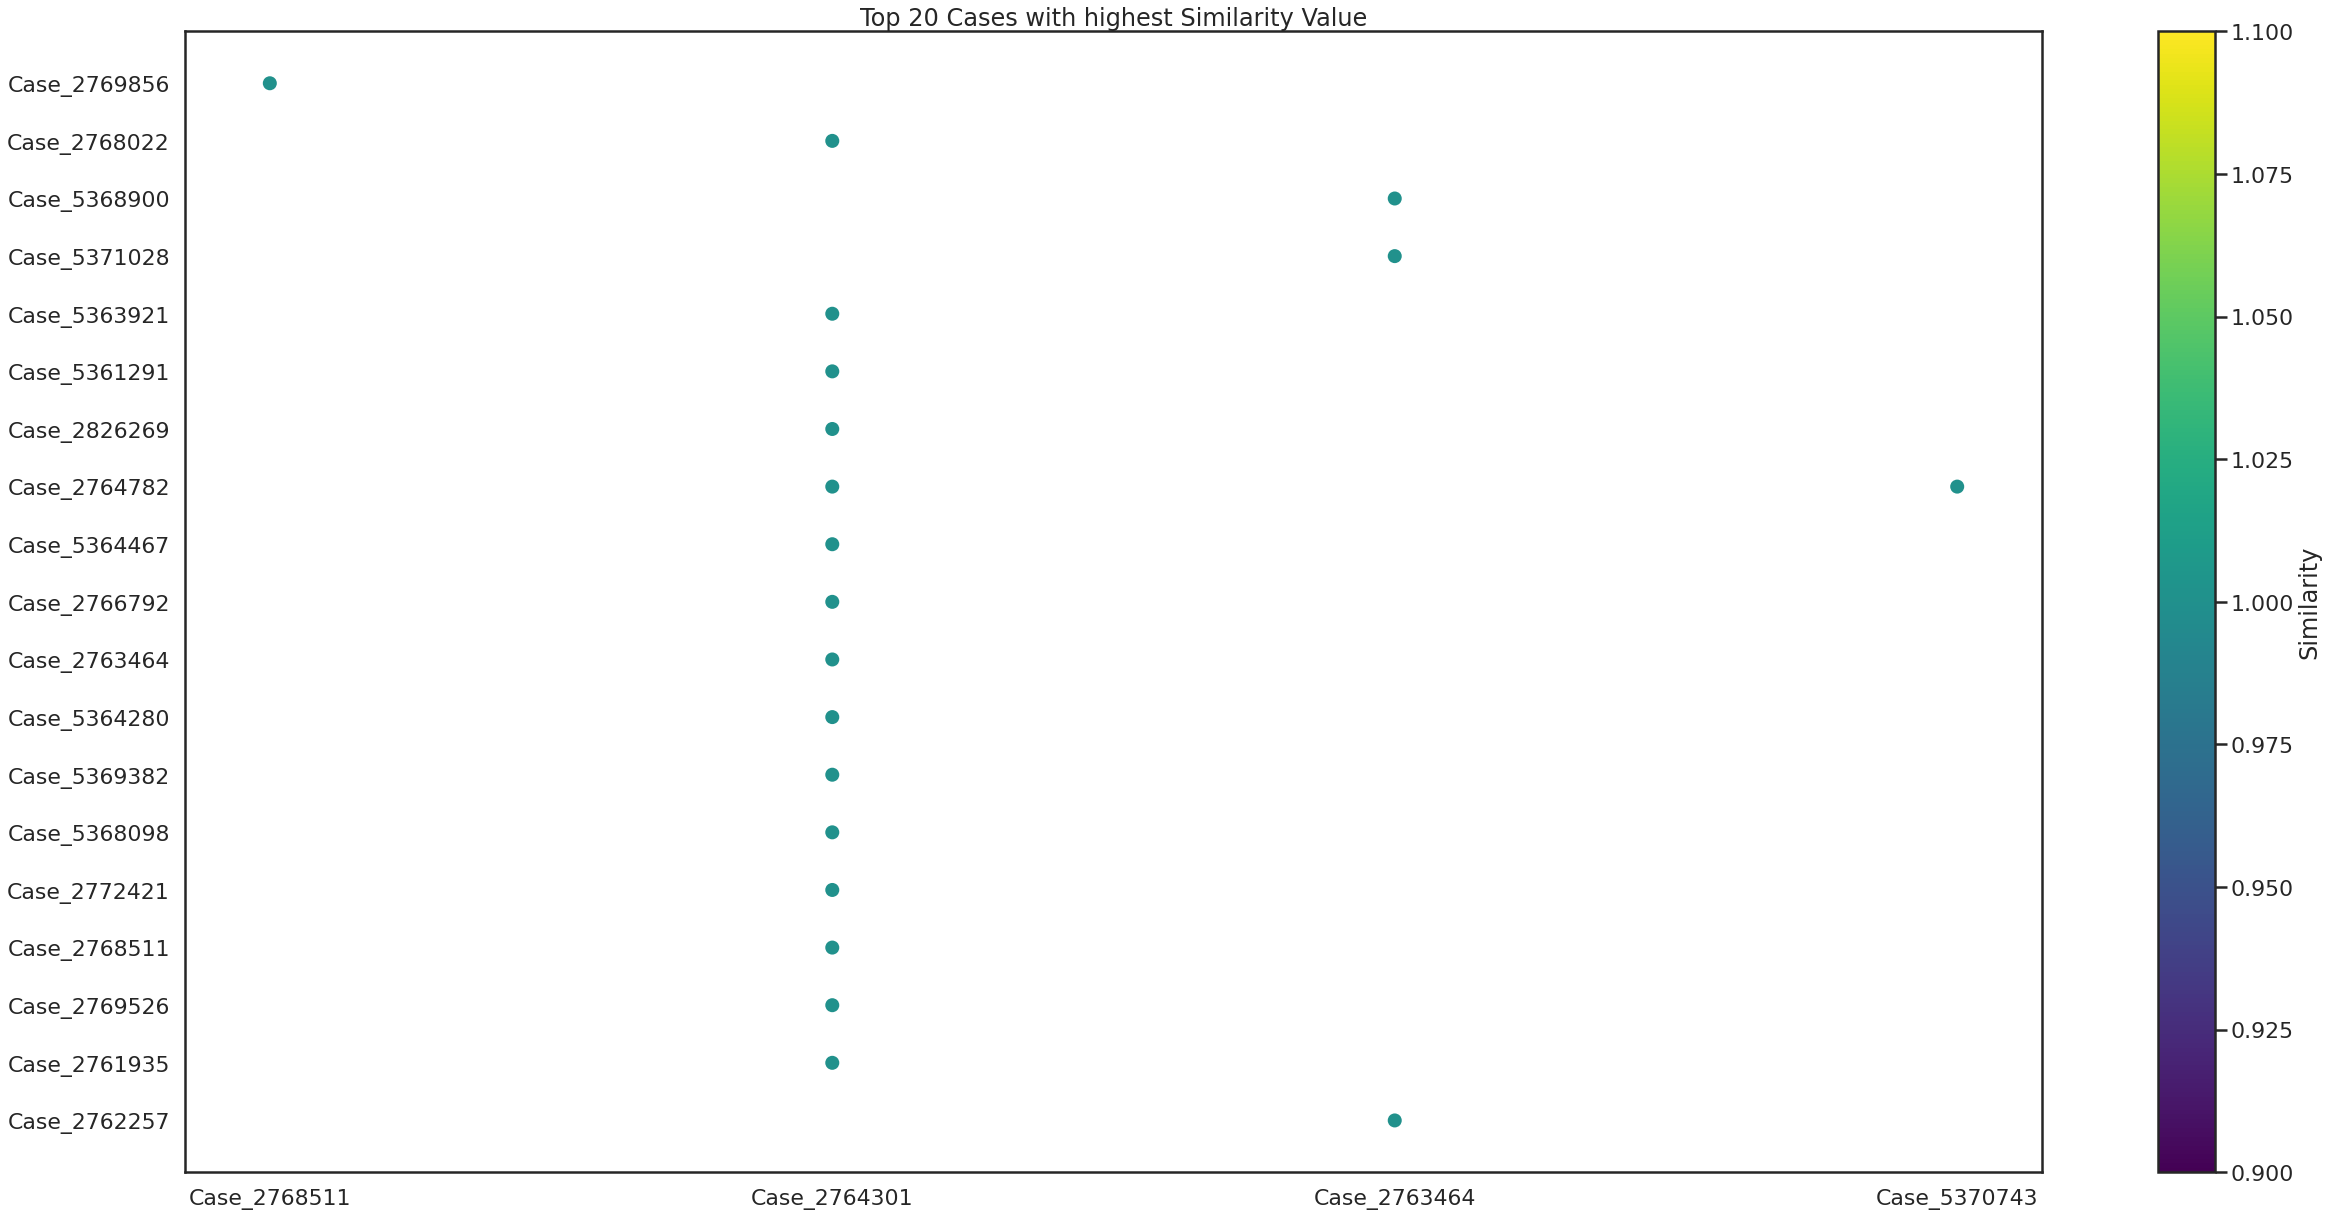

In [4]:
df_sorted = df.sort_values(by='Similarity', ascending=False)

top_20_top_similarity = df_sorted.head(20)
print(top_20_top_similarity)

plt.figure(figsize=(35, 17))
plt.scatter(top_20_top_similarity["Case 1"], top_20_top_similarity["Case 2"], c=top_20_top_similarity['Similarity'], cmap='viridis')


plt.title('Top 20 Cases with highest Similarity Value')


cbar = plt.colorbar()
cbar.set_label('Similarity')
plt.gca().invert_yaxis() 


plt.tight_layout()
plt.show()

               Case 1        Case 2  Similarity
2024235  Case_4735138  Case_2796692         0.0
3323697  Case_2380526  Case_2717240         0.0
2784584  Case_2852612  Case_4714858         0.0
2569778  Case_2797400  Case_4735138         0.0
3015046  Case_2749457  Case_1580788         0.0
3112586  Case_2806483  Case_1580788         0.0
3646722  Case_4714858  Case_5321545         0.0
3112602  Case_2806483  Case_4733752         0.0
3323705  Case_2380526  Case_2854958         0.0
3218617  Case_2718587  Case_4714858         0.0
2896776  Case_2803092  Case_4714858         0.0
1052479  Case_1587511  Case_5377821         0.0
3323710  Case_2380526  Case_2787111         0.0
2569861  Case_2797400  Case_4733024         0.0
3112677  Case_2806483  Case_1578157         0.0
3323716  Case_2380526  Case_2796692         0.0
2896818  Case_2803092  Case_2771956         0.0
3646720  Case_4714858  Case_5331222         0.0
2925564  Case_2797487  Case_4733752         0.0
3112698  Case_2806483  Case_2380526     

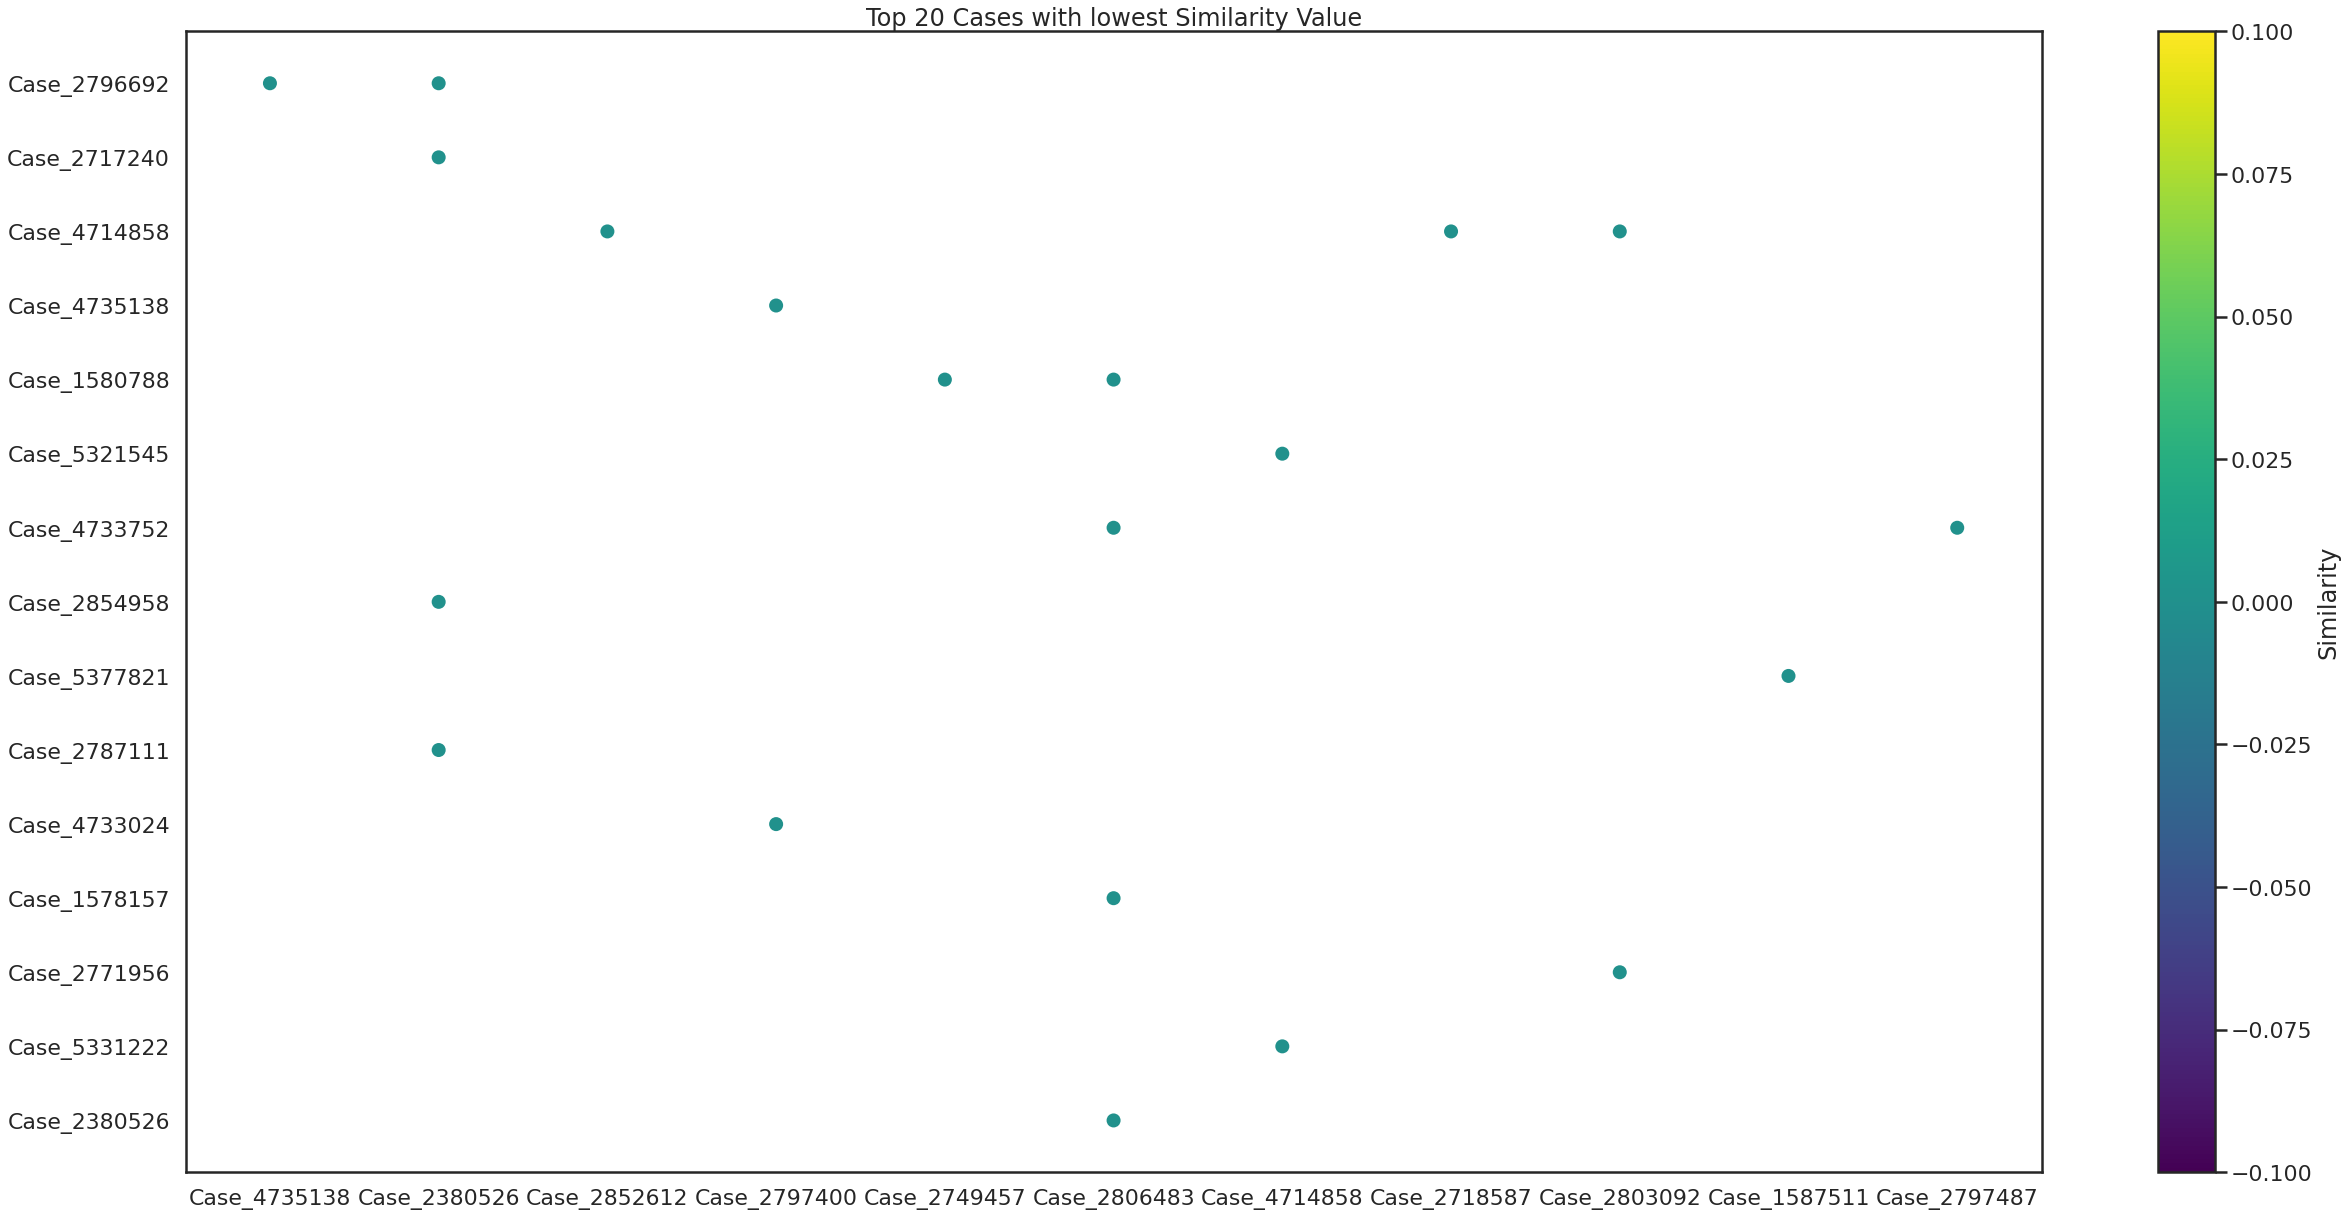

In [5]:
df_sorted = df.sort_values(by='Similarity', ascending=True)

top_20_low_similarity = df_sorted.head(20)
print(top_20_low_similarity)


plt.figure(figsize=(35, 17))
plt.scatter(top_20_low_similarity["Case 1"], top_20_low_similarity["Case 2"], c=top_20_low_similarity['Similarity'], cmap='viridis')


plt.title('Top 20 Cases with lowest Similarity Value')


cbar = plt.colorbar()
cbar.set_label('Similarity')
plt.gca().invert_yaxis() 


plt.tight_layout()
plt.show()

In [6]:
similarities = []

with open('modify_similarities.txt', 'r') as file:
    for line in file:
        # Divide the row by the two points.
        parts = line.strip().split(': ')
        
        if len(parts) == 2:
            # Extract the name of the cases and the similarity value.
            case_names, similarity_str = parts
            case1, case2 = case_names.split(' and ')
            similarity = float(similarity_str)
            similarities.append((case1, case2, similarity))

# Sort similarities in crescent order.
similarities.sort(key=lambda x: x[2], reverse=False)

# Print the top 10 similarities with the lower values.
print("Top 10 similar cases:")
for i, (case1, case2, similarity) in enumerate(similarities[:10]):
    print(f"{i + 1}: {case1} - {case2} (Cosine Similarity: {similarity})")

Top 10 similar cases:
1: Cosine similarity between case_3043 - case_10576 (Cosine Similarity: 0.500004110680197)
2: Cosine similarity between case_1985 - case_17263 (Cosine Similarity: 0.5000195571568411)
3: Cosine similarity between case_107 - case_4958 (Cosine Similarity: 0.5000435908482234)
4: Cosine similarity between case_328 - case_4501 (Cosine Similarity: 0.5000529123922183)
5: Cosine similarity between case_1770 - case_8805 (Cosine Similarity: 0.5000538468654259)
6: Cosine similarity between case_2138 - case_2529 (Cosine Similarity: 0.500072349178182)
7: Cosine similarity between case_2529 - case_2138 (Cosine Similarity: 0.500072349178182)
8: Cosine similarity between case_2815 - case_2962 (Cosine Similarity: 0.5000836572568105)
9: Cosine similarity between case_2962 - case_2815 (Cosine Similarity: 0.5000836572568105)
10: Cosine similarity between case_2686 - case_10406 (Cosine Similarity: 0.5000985816530531)


In [7]:
data = []
file_path = 'modify_similarities.txt'
with open(file_path, 'r') as file:

    for i, line in enumerate(file):

        pattern = r'Cosine similarity between (\S+) and (\S+): ([0-9.]+)'
        match = re.search(pattern, line)
        if match:
            case1 = 'Case_'+str(raw_df.case_id[int(match.group(1).split('_')[1])])
            case2 = 'Case_'+str(raw_df.case_id[int(match.group(2).split('_')[1])])
            similarity = float(match.group(3))
            data.append([case1, case2, similarity])

df_2 = pd.DataFrame(data, columns=['Case 1', 'Case 2', 'Similarity'])

# print Dataframe
print(df_2)

            Case 1        Case 2  Similarity
0       Case_17129  Case_4247246    0.521548
1       Case_18319   Case_257764    0.565306
2       Case_18319  Case_2737507    0.574695
3       Case_17318  Case_4077276    0.507604
4       Case_17318  Case_1594993    0.546294
...            ...           ...         ...
3248  Case_1584636  Case_2768803    0.599399
3249  Case_1584560  Case_2831423    0.522651
3250  Case_1586456  Case_1588551    0.591516
3251  Case_1586357  Case_1584719    0.501438
3252  Case_1586357  Case_1573112    0.559347

[3253 rows x 3 columns]


            Case 1        Case 2  Similarity
2891  Case_1573244  Case_2837775    0.500004
1959  Case_1571045  Case_4333575    0.500020
107    Case_827442  Case_1566706    0.500044
307    Case_827359  Case_1555127    0.500053
1737  Case_1557046   Case_727612    0.500054
2200  Case_1586320  Case_1557030    0.500072
2500  Case_1557030  Case_1586320    0.500072
2826   Case_731655  Case_1224619    0.500084
2708  Case_1224619   Case_731655    0.500084
2608  Case_1597128  Case_2804226    0.500099
608    Case_205979  Case_8841589    0.500117
1884  Case_1573079   Case_142265    0.500154
260    Case_142265  Case_1573079    0.500154
1335   Case_208838  Case_5372505    0.500155
653    Case_106514   Case_711317    0.500182


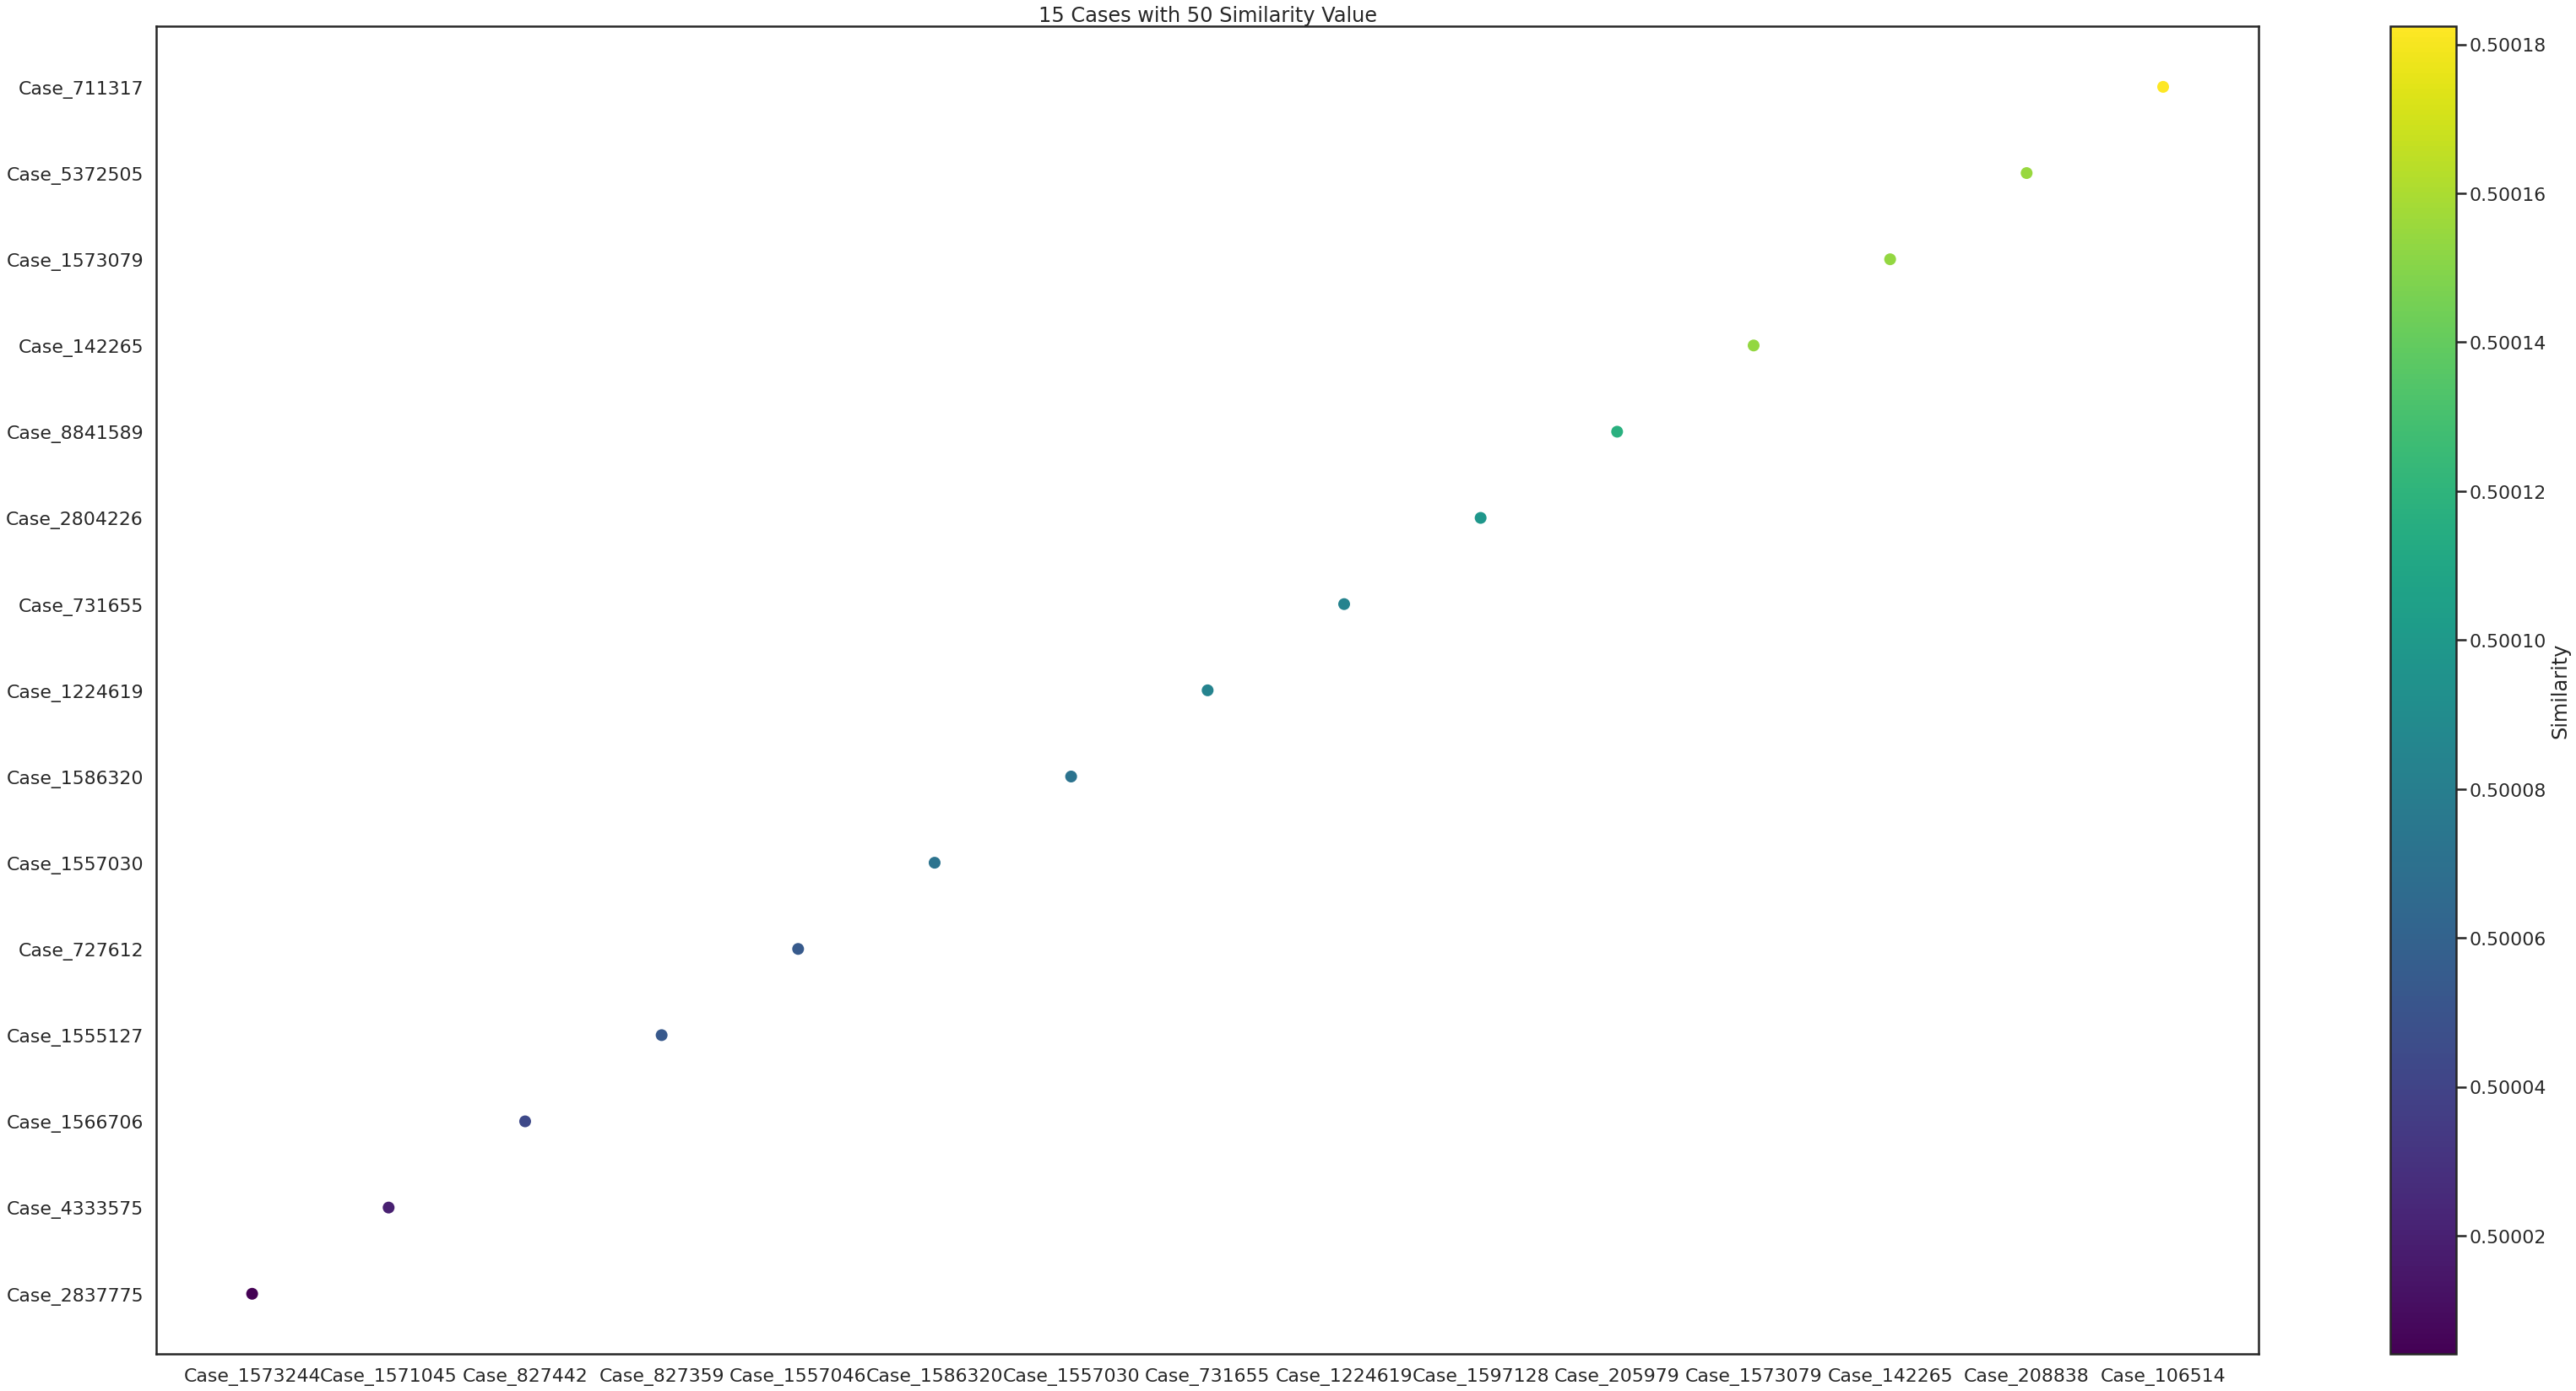

In [8]:

df_2_sorted = df_2.sort_values(by='Similarity')

top_20_lowest_similarity = df_2_sorted.head(15)
print(top_20_lowest_similarity)
plt.figure(figsize=(46, 23))
plt.scatter(top_20_lowest_similarity["Case 1"], top_20_lowest_similarity["Case 2"], c=top_20_lowest_similarity['Similarity'], cmap='viridis')

plt.title('15 Cases with 50 Similarity Value')


cbar = plt.colorbar()
cbar.set_label('Similarity')

plt.tight_layout()
plt.show()

            Case 1        Case 2  Similarity
1165   Case_260716  Case_3692016    0.777532
1459  Case_1590309   Case_183084    0.776137
1230   Case_257710    Case_77192    0.774854
2805    Case_77192   Case_257710    0.774854
594    Case_206025   Case_204478    0.763902
1354   Case_204478   Case_206025    0.763902
173    Case_834284  Case_2871323    0.762750
891    Case_827380  Case_1590291    0.750352
1457  Case_1590291   Case_827380    0.750352
1137   Case_352468  Case_1584637    0.746579
1143   Case_352463  Case_3692016    0.745787
3094  Case_1597066   Case_827413    0.740490
146    Case_827413  Case_1597066    0.740490
1455  Case_1590291  Case_1597066    0.735580
3090  Case_1597066  Case_1590291    0.735580


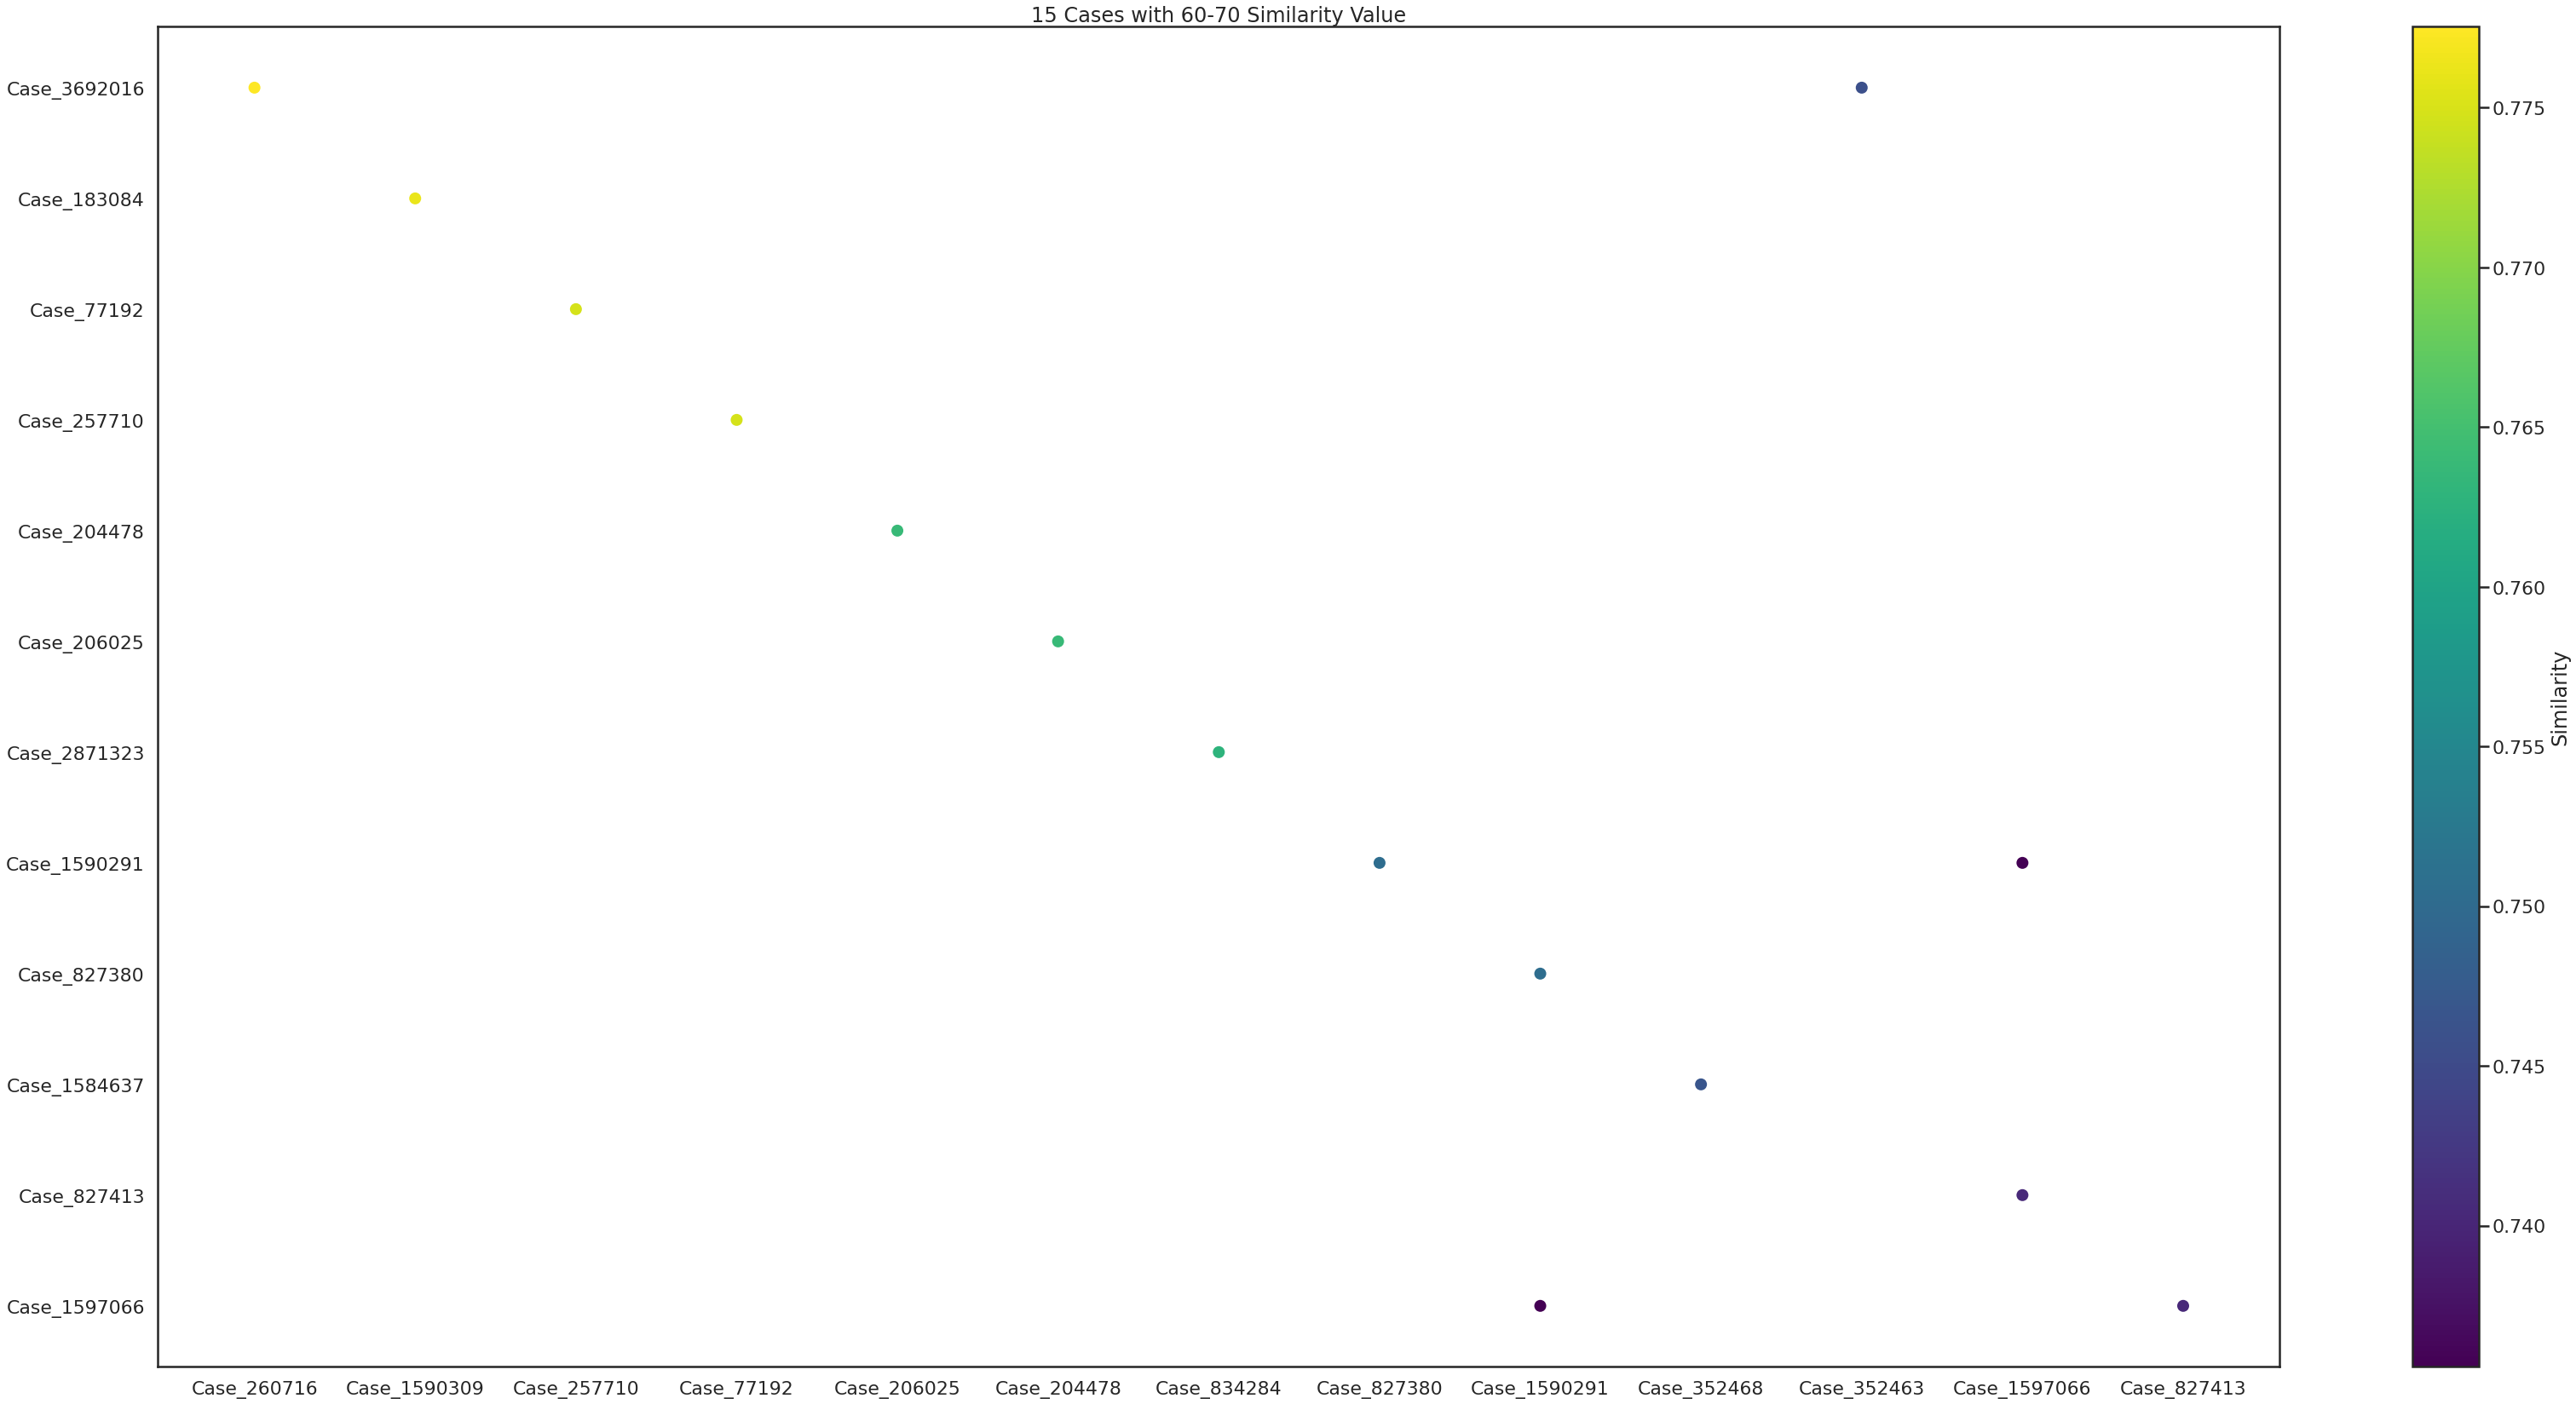

In [9]:
df_2_sorted = df_2.sort_values(by='Similarity', ascending=False)

top_20_top_similarity = df_2_sorted.head(15)

print(top_20_top_similarity)

plt.figure(figsize=(46, 23))
plt.scatter(top_20_top_similarity["Case 1"], top_20_top_similarity["Case 2"], c=top_20_top_similarity['Similarity'], cmap='viridis')


plt.title('15 Cases with 60-70 Similarity Value')


cbar = plt.colorbar()
cbar.set_label('Similarity')
plt.gca().invert_yaxis() 


plt.tight_layout()
plt.show()